# Loan approval Dataset

The data was used from a dataset found on www.kaggle.com 

https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset/discussion?sort=undefined

## Part 1: Exploratory Data Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv('loan_approval_dataset.csv')

In [3]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
#Not needed
df = df.drop('loan_id', axis=1)

In [5]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [6]:
df.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [7]:
na_counts = df.isna().sum()

print(na_counts)

 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64


No missing data, no data cleaning needed

In [8]:
# Strip whitespace from column names
df.columns = df.columns.str.strip()

In [9]:
# Check unique values in the 'loan_status' column
print(df['loan_status'].unique())

[' Approved' ' Rejected']


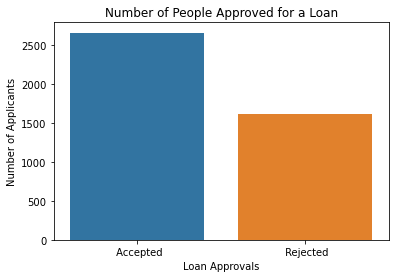

In [10]:
ax = sns.countplot(data=df,x = 'loan_status');
plt.title("Number of People Approved for a Loan")
plt.xlabel("Loan Approvals")
plt.ylabel("Number of Applicants")
plt.xticks(ticks=[0,1],labels=[' Accepted',' Rejected'])
plt.show()

In [11]:
print(np.sum(df['loan_status']==' Rejected'), "People were rejected")
print(np.sum(df['loan_status']==' Approved'), "People were accepted")

1613 People were rejected
2656 People were accepted


### Let's find what was the most important factors that determined this

In [12]:
# Separate numerical and categorical columns
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

Numerical Features: ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
Categorical Features: ['education', 'self_employed', 'loan_status']


In [13]:
# Check unique values in each column
for col in df.columns:
    print(f"Column '{col}' has {df[col].nunique()} unique values.")

Column 'no_of_dependents' has 6 unique values.
Column 'education' has 2 unique values.
Column 'self_employed' has 2 unique values.
Column 'income_annum' has 98 unique values.
Column 'loan_amount' has 378 unique values.
Column 'loan_term' has 10 unique values.
Column 'cibil_score' has 601 unique values.
Column 'residential_assets_value' has 278 unique values.
Column 'commercial_assets_value' has 188 unique values.
Column 'luxury_assets_value' has 379 unique values.
Column 'bank_asset_value' has 146 unique values.
Column 'loan_status' has 2 unique values.


In [14]:
#We can convert columns that have a low amount of unique values into categorical columns. 
#This will help with plotting the variables and when training ML models

# List of columns to convert to categorical
cols_to_convert = ['no_of_dependents', 'education','self_employed','loan_term','loan_status']

# Convert specified columns to categorical
df[cols_to_convert] = df[cols_to_convert].astype('category')

In [15]:
#Lets look at the distribution of the data

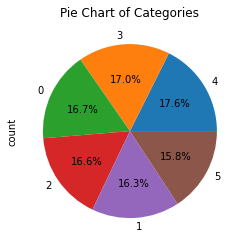

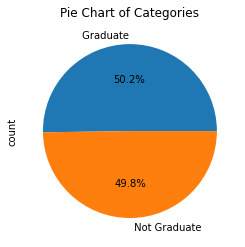

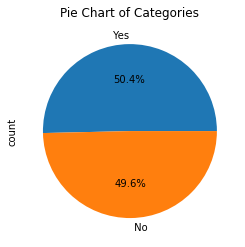

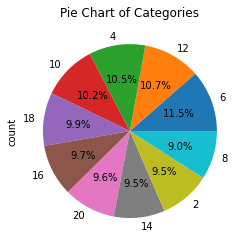

In [16]:
# Pie Chart
df['no_of_dependents'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of Categories')
plt.show()

# Pie Chart
df['education'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of Categories')
plt.show()

# Pie Chart
df['self_employed'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of Categories')
plt.show()

# Pie Chart
df['loan_term'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of Categories')
plt.show()

In [17]:
#Categories are uniformly distributed. Good data provided. 

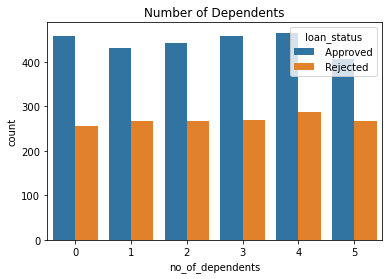

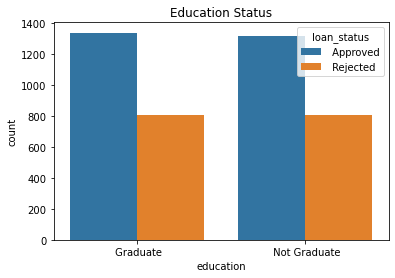

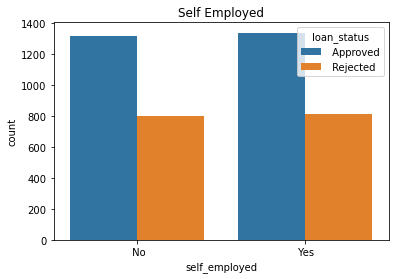

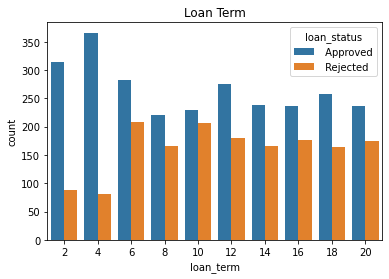

In [18]:
# Count plot
sns.countplot(x='no_of_dependents', hue='loan_status', data=df)
plt.title('Number of Dependents')
plt.show()

# Count plot
sns.countplot(x='education', hue='loan_status', data=df)
plt.title('Education Status')
plt.show()

# Count plot
sns.countplot(x='self_employed', hue='loan_status', data=df)
plt.title('Self Employed')
plt.show()

# Count plot
sns.countplot(x='loan_term', hue='loan_status', data=df)
plt.title('Loan Term')
plt.show()

In [19]:
#Not a general trend between number of dependents, education, self_emplyed. 
#However, the shorter the loan_term, the highter the chance you would be approved for a loan

In [20]:
# Initialize the LabelEncoder
le = LabelEncoder()

# Fit and transform the data
df['loan_status'] = le.fit_transform(df['loan_status'])

In [21]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation with the target variable
correlation_with_target = numerical_df.corr()['loan_status'].sort_values(ascending=True)

print(correlation_with_target)

cibil_score                -0.770518
loan_amount                -0.016150
commercial_assets_value    -0.008246
bank_asset_value            0.006778
residential_assets_value    0.014367
income_annum                0.015189
luxury_assets_value         0.015465
loan_status                 1.000000
Name: loan_status, dtype: float64


In [22]:
#Cibil score has the highest correlation. Although negative, this will still give a lot of insight towards our data

## Part 2: Data Preprocessing

In [23]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
categorical_columns = ['no_of_dependents', 'education','self_employed','loan_term','loan_status']
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [24]:
from sklearn.preprocessing import MinMaxScaler
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [25]:
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,0.4,0.0,0.0,0.969072,0.755102,0.555556,0.796667,0.085616,0.907216,0.575835,0.544218,0.0
1,0.0,1.0,1.0,0.402062,0.303571,0.333333,0.195000,0.095890,0.113402,0.218509,0.224490,1.0
2,0.6,0.0,0.0,0.917526,0.750000,1.000000,0.343333,0.246575,0.231959,0.848329,0.870748,1.0
3,0.6,0.0,0.0,0.824742,0.775510,0.333333,0.278333,0.626712,0.170103,0.591260,0.537415,1.0
4,1.0,1.0,1.0,0.989691,0.609694,1.000000,0.136667,0.428082,0.422680,0.748072,0.340136,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,1.0,0.0,1.0,0.082474,0.051020,0.555556,0.028333,0.099315,0.025773,0.077121,0.054422,1.0
4265,0.0,1.0,1.0,0.319588,0.280612,1.000000,0.431667,0.147260,0.149485,0.275064,0.129252,0.0
4266,0.4,1.0,0.0,0.649485,0.602041,0.888889,0.261667,0.044521,0.639175,0.457584,0.496599,1.0
4267,0.2,1.0,0.0,0.402062,0.318878,0.333333,0.800000,0.284247,0.036082,0.354756,0.394558,0.0


## Splitting the data

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X, y = df.iloc[:,:-1], df.iloc[:,-1] # only getting the attributes that seem relevant, need to determine this
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

In [28]:
X_train

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
1675,1.0,1.0,0.0,0.793814,0.755102,0.222222,0.446667,0.202055,0.716495,0.401028,0.591837
1164,0.0,1.0,1.0,0.969072,0.859694,0.555556,0.683333,0.818493,0.530928,0.971722,0.530612
192,0.2,0.0,0.0,0.061856,0.066327,0.333333,0.636667,0.078767,0.056701,0.066838,0.047619
910,0.4,0.0,1.0,0.484536,0.326531,0.888889,0.756667,0.284247,0.170103,0.416452,0.489796
567,1.0,0.0,1.0,0.288660,0.275510,0.555556,0.235000,0.294521,0.128866,0.179949,0.136054
...,...,...,...,...,...,...,...,...,...,...,...
3444,0.0,0.0,1.0,0.113402,0.112245,0.777778,0.383333,0.113014,0.051546,0.089974,0.054422
466,1.0,1.0,1.0,0.030928,0.038265,0.888889,0.185000,0.037671,0.025773,0.025707,0.013605
3092,0.8,1.0,1.0,0.865979,0.517857,0.777778,0.248333,0.373288,0.546392,0.730077,0.367347
3772,0.4,1.0,1.0,0.701031,0.538265,0.555556,0.401667,0.130137,0.067010,0.501285,0.653061


In [29]:
y_train

1675    0.0
1164    0.0
192     0.0
910     0.0
567     1.0
       ... 
3444    1.0
466     1.0
3092    1.0
3772    1.0
860     0.0
Name: loan_status, Length: 3415, dtype: float64

## Part 3: Creating the ML Model

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn import model_selection

In [31]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))
models.append(('LSVC', LinearSVC()))
models.append(('RFC', RandomForestClassifier()))
models.append(('DTR', DecisionTreeClassifier()))

In [32]:
seed = 7
results = []
names = []
X = X_train
Y = y_train


for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle=True,random_state=42)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
    ### see https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter for scoring parameter
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (
        name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.915952 (0.007822)
KNN: 0.900732 (0.006598)
NB: 0.933531 (0.013800)
SVC: 0.935869 (0.014748)
LSVC: 0.919763 (0.004977)
RFC: 0.982137 (0.008115)
DTR: 0.975112 (0.006569)


In [33]:
#Todo: Lets try using a Neural Network for this

In [34]:
import tensorflow as tf

In [35]:
ann = tf.keras.models.Sequential() #Initalize
ann.add(tf.keras.layers.Dense(units=6, activation='relu')) #first layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu')) #Second 
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) #Output

In [36]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ["accuracy"])
ann.fit(X_train, y_train, batch_size=32, epochs=200, verbose=1)

Epoch 1/200
107/107 [==============================] - 1s 1ms/step - loss: 0.7084 - accuracy: 0.4732
Epoch 2/200
107/107 [==============================] - 0s 1ms/step - loss: 0.6678 - accuracy: 0.6211
Epoch 3/200
107/107 [==============================] - 0s 921us/step - loss: 0.5950 - accuracy: 0.7174
Epoch 4/200
107/107 [==============================] - 0s 937us/step - loss: 0.5010 - accuracy: 0.8284
Epoch 5/200
107/107 [==============================] - 0s 990us/step - loss: 0.4015 - accuracy: 0.8679
Epoch 6/200
107/107 [==============================] - 0s 1ms/step - loss: 0.3302 - accuracy: 0.8893
Epoch 7/200
107/107 [==============================] - 0s 2ms/step - loss: 0.2873 - accuracy: 0.8981
Epoch 8/200
107/107 [==============================] - 0s 952us/step - loss: 0.2611 - accuracy: 0.9034
Epoch 9/200
107/107 [==============================] - 0s 925us/step - loss: 0.2439 - accuracy: 0.9122
Epoch 10/200
107/107 [==============================] - 0s 897us/step - loss: 0.2

In [37]:
#Lets make a more complex model

In [38]:
# Initialize the ANN
ann = tf.keras.models.Sequential()

# Adjust the input dimension based on your data
ann.add(tf.keras.layers.Dense(units=128, activation='relu', input_dim=11)) 

# Add dropout for regularization
ann.add(tf.keras.layers.Dropout(0.2))  # Dropout layer with 20% dropout rate

# Add additional hidden layers
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.BatchNormalization())
ann.add(tf.keras.layers.Dense(units=32, activation='relu'))
ann.add(tf.keras.layers.Dropout(0.3))  # Dropout rate increased to 30%
ann.add(tf.keras.layers.Dense(units=16, activation='relu'))

# Output layer for binary classification
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compile the ANN
ann.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
            loss='binary_crossentropy', 
            metrics=['accuracy'])

# Optionally, use EarlyStopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ["accuracy"])

In [39]:
#We made the activation sigmoid so we can get a probability function. 
#We made the last unit once since we are dealing with a binary classification

In [66]:
#Best optimizer that can perform stochastic gradient descent. This will update the weights to reduce the loss (error). We will use adam
#For binary classification, we must use binary_crossentropy. If we had 3 or more, we would use categorical_crossentropy We must also change the activation from sigmoid to softmax
#For metrics, we will use accuracy

In [41]:
ann.fit(X_train, y_train, batch_size=32, epochs=200, verbose=1)
#32 is a typical value

Epoch 1/200
107/107 [==============================] - 1s 1ms/step - loss: 0.4983 - accuracy: 0.7438
Epoch 2/200
107/107 [==============================] - 0s 1ms/step - loss: 0.2885 - accuracy: 0.8779
Epoch 3/200
107/107 [==============================] - 0s 1ms/step - loss: 0.2498 - accuracy: 0.8922
Epoch 4/200
107/107 [==============================] - 0s 1ms/step - loss: 0.2537 - accuracy: 0.8943
Epoch 5/200
107/107 [==============================] - 0s 1ms/step - loss: 0.2351 - accuracy: 0.9051
Epoch 6/200
107/107 [==============================] - 0s 1ms/step - loss: 0.2116 - accuracy: 0.9107
Epoch 7/200
107/107 [==============================] - 0s 1ms/step - loss: 0.2120 - accuracy: 0.9148
Epoch 8/200
107/107 [==============================] - 0s 1ms/step - loss: 0.1989 - accuracy: 0.9148
Epoch 9/200
107/107 [==============================] - 0s 1ms/step - loss: 0.1757 - accuracy: 0.9265
Epoch 10/200
107/107 [==============================] - 0s 1ms/step - loss: 0.1882 - accura

## Part 4: Model Analysis

In [45]:
X, y = df.iloc[:,:-1], df.iloc[:,-1] # only getting the attributes that seem relevant, need to determine this
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

In [46]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract values from the confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy}')
print(f'True Positives (TP): {tp}')
print(f'True Negatives (TN): {tn}')
print(f'False Positives (FP): {fp}')
print(f'False Negatives (FN): {fn}')

# Optionally, you can also print a classification report for more metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.977751756440281
True Positives (TP): 308
True Negatives (TN): 527
False Positives (FP): 9
False Negatives (FN): 10

Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       536
         1.0       0.97      0.97      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



## Part 5: Data Pipeline

In [55]:
from sklearn.pipeline import Pipeline

In [65]:
X, y = df.iloc[:,:-1], df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

pipeline = Pipeline([
    ('scaler', MinMaxScaler()),               # Step 1: Scale the features
    ('classifier', DecisionTreeClassifier())  # Step 2: Apply Decision Tree Classifier
])

pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       536
         1.0       0.98      0.96      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854



## Part 6: Conclusion